# # Project: 'Seattle Airbnb project' - CRISP-DM

## Table of Contents
<ul>
<li><a href="#intro">Introduction/Business Understanding</a></li>
<li><a href="#understand">Data Understanding</a></li>
<li><a href="#prepare">Data Preparation</a></li>
<li><a href="#model">Data Modelling</a></li>
<li><a href="#results">Results</a></li>
<li><a href="#conclusions">Deploy/Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction/Business Understanding

> This project is part of the Udacity coursework utilizing the Cross-Industry Standard Process for Data Mining (CRISP-DM) process to analyze data.
The CRISP-DM process includes 6 steps;
1. Developing business understanding
2. Data understanding
3. Preparing data to be analyzed
4. Data modelling
5. Evaluating results to answer questions
6. Deploying changes based on the results






<a id='understand'></a>
## Data Understanding

>This project utilized Seattle Airbnb data from kaggle.com.Using this data, I was interested in answering these 3 questions:
1. What combination of variables are good predictors of rental prices?
2. What time of the year are average prices high and when are they low?
3. What is the variability among property types in relation to prices?

In [3]:
# import all the necessary modules/packages
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.dates as dates
from datetime import datetime
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [4]:
# loading data
  
# specifying the zip file name 
file_name = "seattle.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
listings.csv                                   2018-06-26 04:29:14     16871061
reviews.csv                                    2018-06-26 04:29:16     36592035
calendar.csv                                   2018-06-26 04:29:16     36650955
Extracting all the files now...
Done!


In [5]:
listings_df = pd.read_csv('listings.csv')
reviews_df = pd.read_csv('reviews.csv')
calendar_df = pd.read_csv('calendar.csv')

In [4]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [8]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [18]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [20]:
listings_df.shape

(3818, 92)

**The listings data contains information on 3818 property types with 92 columns containing information ranging from the location of the listing, reviews, room types, square footage, number of bedrooms and bedrooms etc.** 


<a id='prepare'></a>
## Data Preparation

>This part of the process explores the data more on issues related to messiness and untidy data such as missing values, wrong datatypes, categorical variables etc.

#### Continuous Variables

In [6]:
# convert the price variable to float so as remove the dollar sign in front
listings_df['price'] = listings_df['price'].str.replace("[$, ]", "").astype("float")

In [7]:
# convert it to integer 
listings_df['price'] = listings_df['price'].astype(int)

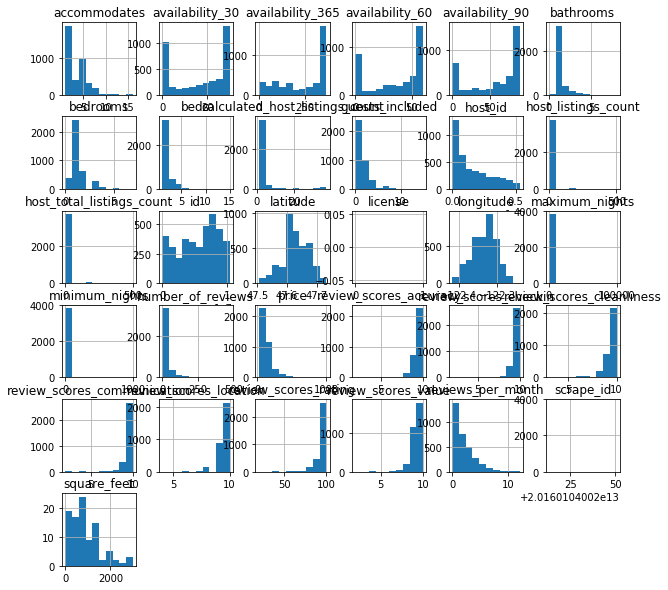

In [8]:
# histograms of all continuous variables 
listings_df.hist(figsize=(10,10));


** The steps below will explore the variables further for skewness and use log transformation to get an almost normal distribution of the data which is necessary for linear regression modelling**

(array([1883.,  398.,  969.,  332.,  171.,   13.,   28.,   15.,    3.,
           6.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

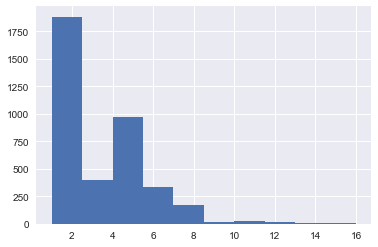

In [163]:
# accomodates variable
plt.hist(listings_df['accommodates'])

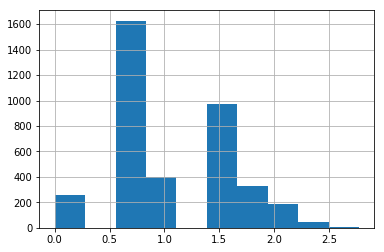

In [9]:
# transformation
listings_df['accommodates'].apply(np.log).hist()
plt.show()

In [13]:
# replace missing values with 0
listings_df['bathrooms'] = listings_df['bathrooms'].replace('nan', np.nan).fillna(0)

(array([5.50e+01, 3.13e+03, 3.73e+02, 1.88e+02, 5.70e+01, 1.10e+01,
        2.00e+00, 0.00e+00, 0.00e+00, 2.00e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

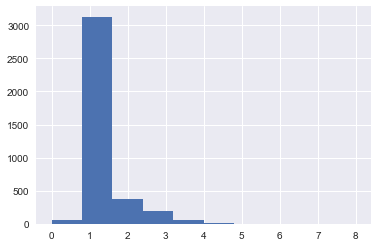

In [171]:
plt.hist(listings_df['bathrooms'])

In [ ]:
# replace missing values with 0
listings_df['bedrooms'] = listings_df['bedrooms'].replace('nan', np.nan).fillna(0)

(array([3.780e+02, 2.417e+03, 6.400e+02, 0.000e+00, 2.830e+02, 6.900e+01,
        0.000e+00, 2.400e+01, 6.000e+00, 1.000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

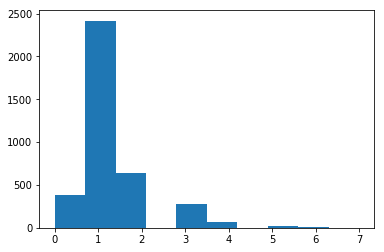

In [12]:
plt.hist(listings_df['bedrooms'])

In [14]:
# replace missing values with 0
listings_df['beds'] = listings_df['beds'].replace('nan', np.nan).fillna(0)

(array([3.780e+02, 2.417e+03, 6.400e+02, 0.000e+00, 2.830e+02, 6.900e+01,
        0.000e+00, 2.400e+01, 6.000e+00, 1.000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

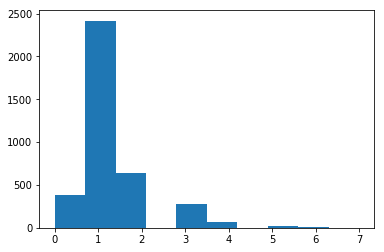

In [15]:
plt.hist(listings_df['bedrooms'])

In [16]:
# fill missing values with 0
listings_df['square_feet'] = listings_df['square_feet'].replace('nan', np.nan).fillna(0)

(array([3.74e+03, 1.70e+01, 2.40e+01, 9.00e+00, 1.50e+01, 2.00e+00,
        5.00e+00, 2.00e+00, 1.00e+00, 3.00e+00]),
 array([   0.,  300.,  600.,  900., 1200., 1500., 1800., 2100., 2400.,
        2700., 3000.]),
 <a list of 10 Patch objects>)

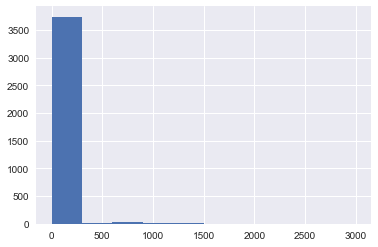

In [177]:
plt.hist(listings_df['square_feet'])

In [19]:
listings_df['guests_included'] = listings_df['guests_included'].replace('nan', np.nan).fillna(0)

(array([2.244e+03, 1.147e+03, 2.720e+02, 9.300e+01, 3.500e+01, 1.300e+01,
        5.000e+00, 4.000e+00, 1.000e+00, 4.000e+00]),
 array([  20.,  118.,  216.,  314.,  412.,  510.,  608.,  706.,  804.,
         902., 1000.]),
 <a list of 10 Patch objects>)

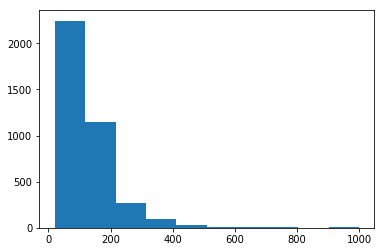

In [21]:
plt.hist(listings_df['price'])

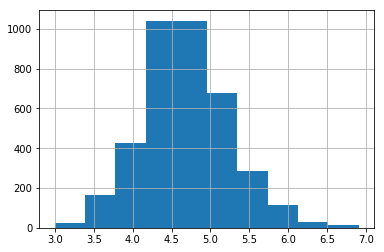

In [22]:
listings_df['price'].apply(np.log).hist()
plt.show()

** The data for 'price' and 'accomodates' was skewed to the left and was therefore transformed to normal drintribution.** 

### Univariate Analysis

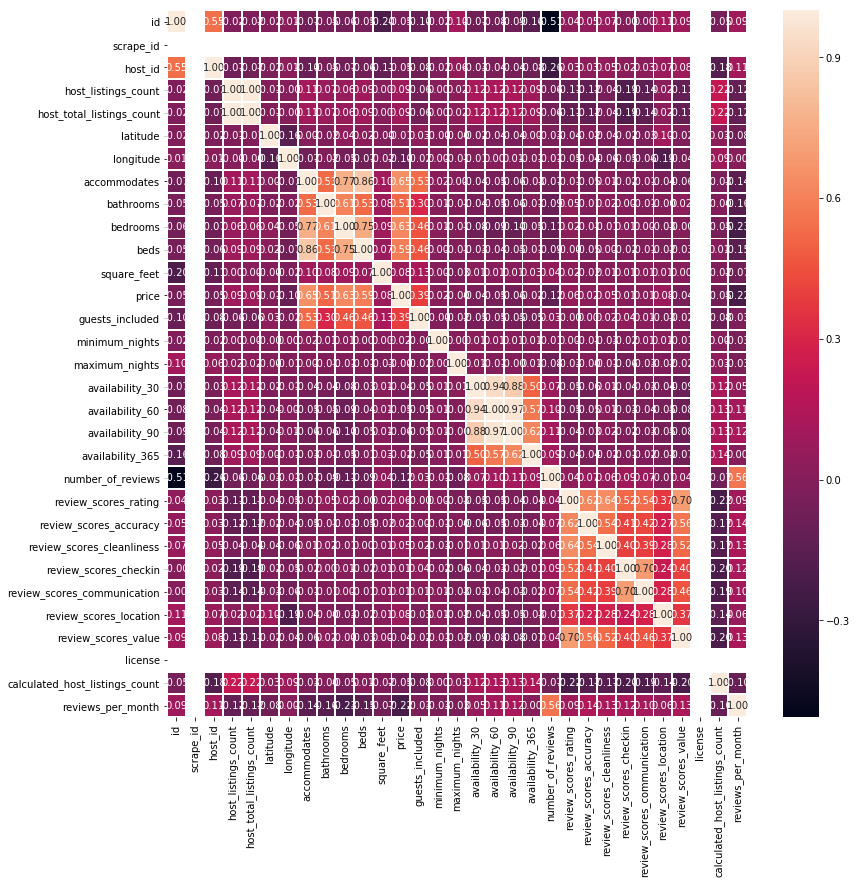

In [24]:
# heat map showing correlations between variables
fig, ax = plt.subplots(figsize =(13, 13))
sns.heatmap(listings_df.corr(), annot=True, fmt='.2f', linewidths =.9);


> **From the heatmap above the following variables are positively correlated to price;**
    1. guests_included (coeff. 0.39)
    2. beds (coeff.0.59)
    3. bedrooms (coeff. 0.63)
    4. bathrooms (coeff. 0.5)
    5. accomodates (coeff. 0.65)
    
 

In [37]:
listings_df.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       

#### Categorical Variables Analysis

>For categorical varaibles, I was interested in the room type, property type and cancellation policy variables

C:\Users\Miriam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


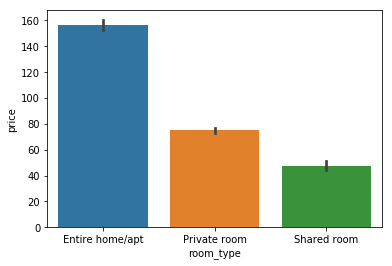

In [39]:
# bar plot of room type by prices
ax2 = sns.barplot(x="room_type", y="price", data=listings_df)

**Renting an entire home/apt vs renting a room or shared room is more pricier**

C:\Users\Miriam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


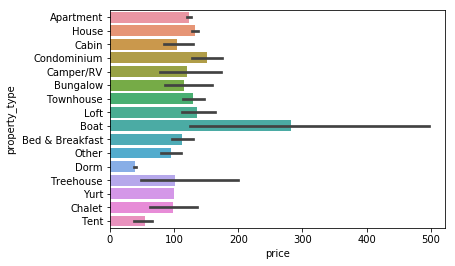

In [45]:
# bar graph of prices vs property type
ax3 = sns.barplot(x="price", y="property_type", data=listings_df)

**Looking at the different property types, boats were the most expensive, followed by condominiums, houses and apartments. Renting a dorm room was the cheapest of all property types. **

C:\Users\Miriam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


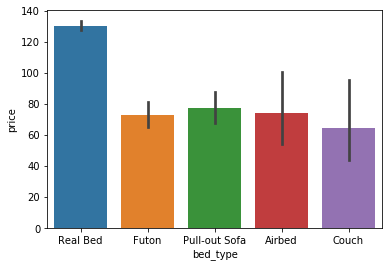

In [46]:
# bar plot of bedtype vs prices
ax4 = sns.barplot(x="bed_type", y="price", data=listings_df)

**property types that had advertised couches and futons as extra bedtypes were more affordable.**

C:\Users\Miriam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


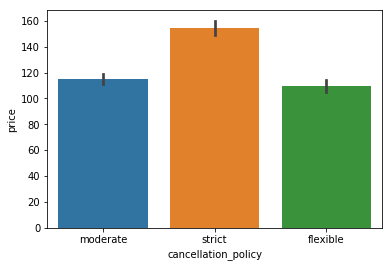

In [47]:
ax4 = sns.barplot(x="cancellation_policy", y="price", data=listings_df)

**Property types with a strict cancellation policy are more pricy than those with flexible and moderate cancellation policies**

<a id='model'></a>
## Data Modelling

### Linear regression - Continuous variables

In [32]:
# creating a new dataframe
listings_df1= listings_df[["accommodates", "bedrooms", "bathrooms", "price",\
                            "beds", "guests_included"]]

In [33]:
# view the first 5 rows of the dataset
listings_df1.head()

,accommodates,bedrooms,bathrooms,price,beds,guests_included
0,4,1.0,1.0,85,1.0,2
1,4,1.0,1.0,150,1.0,1
2,11,5.0,4.5,975,7.0,10
3,3,0.0,1.0,100,2.0,1
4,6,3.0,2.0,450,3.0,6


In [34]:
# data structure
listings_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 6 columns):
accommodates       3818 non-null int64
bedrooms           3818 non-null float64
bathrooms          3818 non-null float64
price              3818 non-null int32
beds               3818 non-null float64
guests_included    3818 non-null int64
dtypes: float64(3), int32(1), int64(2)
memory usage: 164.1 KB


**No missing data in the new dataframe**

In [35]:
# Correlation coefficients for the variables
listings_df1.corr()

,accommodates,bedrooms,bathrooms,price,beds,guests_included
accommodates,1.000000,0.769680,0.533586,0.652218,0.860714,0.532796
bedrooms,0.769680,1.000000,0.605989,0.626891,0.752720,0.456755
bathrooms,0.533586,0.605989,1.000000,0.512133,0.528864,0.304501
price,0.652218,0.626891,0.512133,1.000000,0.588455,0.392875
beds,0.860714,0.752720,0.528864,0.588455,1.000000,0.460561
guests_included,0.532796,0.456755,0.304501,0.392875,0.460561,1.000000


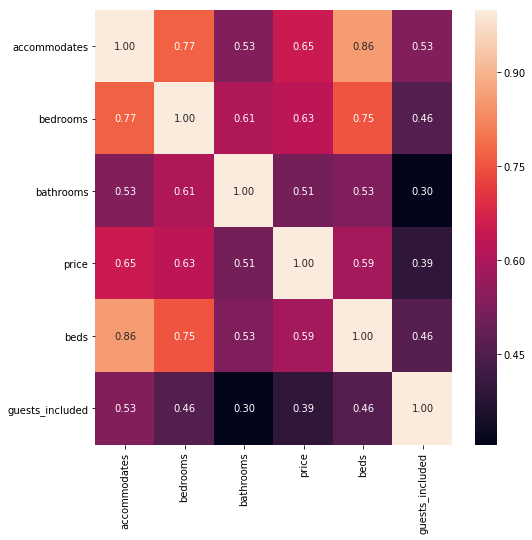

In [36]:
fig, ax = plt.subplots(figsize =(8, 8))
sns.heatmap(listings_df1.corr(), annot=True, fmt='.2f');

In [49]:
#Split into explanatory and response variables
X = listings_df1[["accommodates", "bedrooms", "bathrooms","beds", "guests_included"]]
y = listings_df1["price"]

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
y_train_preds = lm_model.predict(X_train)


"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.49984313520796797 on 1146 values.'

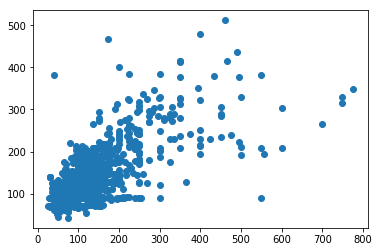

In [50]:
# visualize the predictions 
plt.scatter(y_test,y_test_preds)

**After running a regression model using these variables, I got an R-squared value of 0.5 which means that only 50% of the variations in the rental prices are due to these the number of people it accomodates, number of bathrooms, bedrooms, beds and guest included.**

### Linear regression - Categorical variables

In [51]:
# creating a new dataframe with the categorical variables
listings_cat_df = listings_df[["bed_type", "cancellation_policy", "room_type", "property_type", "price"]]

In [52]:
listings_cat_df.head()

,bed_type,cancellation_policy,room_type,property_type,price
0,Real Bed,moderate,Entire home/apt,Apartment,85
1,Real Bed,strict,Entire home/apt,Apartment,150
2,Real Bed,strict,Entire home/apt,House,975
3,Real Bed,flexible,Entire home/apt,Apartment,100
4,Real Bed,strict,Entire home/apt,House,450


In [53]:
# drop prices since its a response variable
listings_cat_df  = listings_cat_df.dropna(subset=['price'], axis=0)

In [54]:
# identifying categorical variables
cat_df = listings_cat_df.select_dtypes(include=['object'])
cat_cols_list = cat_df.columns
cat_cols_list


Index(['bed_type', 'cancellation_policy', 'room_type', 'property_type'], dtype='object')

In [55]:
#Pull a list of the column names of the categorical variables

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - dataframe with the categorical variables that need to be dummied
    cat_cols - list of strings associated with the categorical variables
    dummy_na - whether you want ot dummy Nan vals or not (false/True)
    
    OUTPUT:
    df - new dataframe with all the new dummy columns and removes the original columns
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [56]:
# create dummy variables 
df = create_dummy_df(listings_cat_df, cat_cols_list, dummy_na=False) #Use your newly created function

# Show a header of df_new to check
print(df.shape)

(3818, 24)


In [58]:
df.columns.values

array(['price', 'bed_type_Couch', 'bed_type_Futon',
       'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'room_type_Private room', 'room_type_Shared room',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Tent', 'property_type_Townhouse',
       'property_type_Treehouse', 'property_type_Yurt'], dtype=object)

In [59]:
df.head()

,price,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,room_type_Private room,room_type_Shared room,property_type_Bed & Breakfast,...,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt
0,85,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,150,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,975,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,100,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,450,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [60]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT: 
    df - dataframe of interest
    response_col - name of the rensponse column
    cat_cols - list of strings associated with the categorical variables
    dummy_na - whether you want ot dummy Nan vals or not (false/True)
    test_size - proportion of data that should be in the test data
    rand_state - random state for splitting data into training and testing data
    
    OUTPUT:
    test_score - r2 score of test data
    train_score - r2 score of test data
    lm_model - model from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df, 'price', cat_cols_list, dummy_na=False)

In [61]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.25384926284705134.  The rsquared on the test data was 0.28779260569003906.


#### Data Exploration - Calendar dataset
**In order to answer the question on What time of the year the average prices are high and when are they low, I explored the calendar dataset**

In [62]:
# view the first 10 rows
calendar_df.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [63]:
# info
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


** The dataset had 1393570 entries and the price column is the only one that had missing data**

In [64]:
# remove the dollar sign from price and convert it to a float
calendar_df['price'] = calendar_df['price'].str.replace("[$, ]", "").astype("float")

In [65]:
# drop all the valuew in other columns not contained in the price column since price is the response variable
new_df  = calendar_df.dropna(subset=['price'], axis=0)

In [67]:
new_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


In [68]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
listing_id    934542 non-null int64
date          934542 non-null object
available     934542 non-null object
price         934542 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 35.6+ MB


In [69]:
# convert date to datetime datatype and select the month
new_df['month'] = pd.DatetimeIndex(new_df['date']).month
new_df.head()

C:\Users\Miriam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,listing_id,date,available,price,month
0,241032,2016-01-04,t,85.0,1
1,241032,2016-01-05,t,85.0,1
9,241032,2016-01-13,t,85.0,1
10,241032,2016-01-14,t,85.0,1
14,241032,2016-01-18,t,85.0,1


In [70]:
# rank the data by month number
new_df['month_num'] = new_df.month.rank(method='dense')

new_df.head()

C:\Users\Miriam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,listing_id,date,available,price,month,month_num
0,241032,2016-01-04,t,85.0,1,1.0
1,241032,2016-01-05,t,85.0,1,1.0
9,241032,2016-01-13,t,85.0,1,1.0
10,241032,2016-01-14,t,85.0,1,1.0
14,241032,2016-01-18,t,85.0,1,1.0


In [71]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 6 columns):
listing_id    934542 non-null int64
date          934542 non-null object
available     934542 non-null object
price         934542 non-null float64
month         934542 non-null int64
month_num     934542 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 49.9+ MB


In [72]:
# group the months by average prices
calendar_df2 = new_df[['month', 'price']]
avg_prices_df2 = calendar_df2.groupby(['month']).mean()

In [26]:
avg_prices_df2.head(12)

,price
month,
1,122.912176
2,124.293927
3,128.644488
4,135.097005
5,139.538183
6,147.473137
7,152.094150
8,150.656594
9,143.255949


''

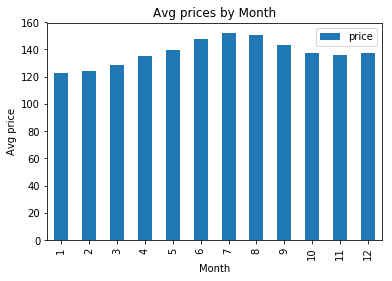

In [27]:
# bar plot of average prices by month
avg_prices_df2.plot.bar()
plt.title('Avg prices by Month')
plt.xlabel('Month')
plt.ylabel('Avg price')

;

<a id='results'></a>
## Results

> Using the results gained from data analyses I was able to answer the specific questions that I was interested in;

**Question 1:What combination of variables are good predictors of rental prices?**
> >The rental prices increased significantly with increase in the number of bathrooms, beds and the number of people the property type can accommodate. Surprisingly, the square footage of the property didn’t really have a huge influence in the price of the rental. After running a regression model using these variables, I got an R-squared value of 0.5 which means that only 50% of the variations in the rental prices are due to these variables.

** Question 2. What time of the year are average prices high and when are they low?**
> >  I was able to determine that the months of June, July, and August had the highest average prices recorded of 147.47, 150.67 and 150.67 dollars consecutively. January had the lowest average price of 122.91 dollars. Using these statistics, you can better plan on what times to visit Seattle for affordable rates considering too the weather since summer months are more likely to be more expensive that cold months. These however are average prices which mean that in some cases depending on location and other factors such as property type, individual prices can be higher for other times of the year.

** Question 3. What is the variability among property types in relation to prices?** 
> > Boats were the most expensive, followed by condominiums, houses and apartments. Renting a dorm room was the cheapest of all property types.


<a id='conclusions'></a>
## Deploy/Conclusions

> This article utilized Airbnb data from Seattle in 2016 and aimed at answering these three questions: which months are generally more expensive and which ones are affordable, factors that are highly correlated to rental prices and how the property types differ in terms of prices.

>I found that on average summer months are more expensive than colder months, renting a boat will cost you a substantial buck compared to other property types and make sure to consider the number of bedrooms, bathrooms, square-footage of the property and the number of guests it accommodates as these tend to increase with increased rental prices.
Either way, regardless of the time of the visit, I believe you can always find an affordable rental property somewhere in Seattle, as the visit is well worth your time.
